<a href="https://colab.research.google.com/github/antoniobcunha/Data_Science/blob/master/Analisando_os_Dados_do_Airbnb_(Barcelona).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise dos Dados do Airbnb - *Barcelona/Espanha*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados 

Todos os dados utilizados nesta análise foram obtidos a partir do site [Inside Airbnb] (http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Barcelona (good for visualisations).* 




In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-05-11/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` = número de id gerador para identificar o imóvel 
* `name` = nome da propriedade anunciada
* `host_id` = nome do anfitrião 
* `neighborhood_group` = esta coluna não contém nenhum valor válido 
* `neighborhood` = nome do bairro 
* `latitude` = coordenada de latitude da propriedade
* `longitude` = coordenada de longitude da propriedade
* `room_type` = informa o tipo de quarto oferecido 
* `price` = preço para alugar o imóvel 
* `minimum_nights` = quantidade mínimas de noites para reservar 
* `number_of_reviews` = número de reviews que a propriedade possui 
* `last_review` = data do último review 
* `reviews_per_month` = quantidade de reviews por mês 
* `calculated_host_listings_count` = quantidade de imóveis do mesmo anfitrião 
* `availability_365` = número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38077,2.17551,Private room,60,3,2,2017-11-06,0.05,3,90
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.47,2,345
2,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,58,1,188,2020-03-09,1.67,29,337
3,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,66,1,94,2020-03-07,0.83,29,331
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.59,6,329
5,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37916,2.17535,Private room,100,5,8,2013-07-15,0.07,3,180
6,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,227,5,149,2020-03-11,1.27,3,52
7,35379,Double 02 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39036,2.15274,Private room,40,2,303,2020-03-18,3.05,4,342
8,35388,Single 01 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39065,2.15196,Private room,30,2,237,2019-12-20,2.17,4,253
9,35390,Single 02 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39153,2.15125,Private room,30,2,258,2020-03-15,2.65,4,355


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que o nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` há uma versão mais completa (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20858
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 25% das linhas



In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.256352
last_review                       0.256352
name                              0.000719
host_name                         0.000288
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

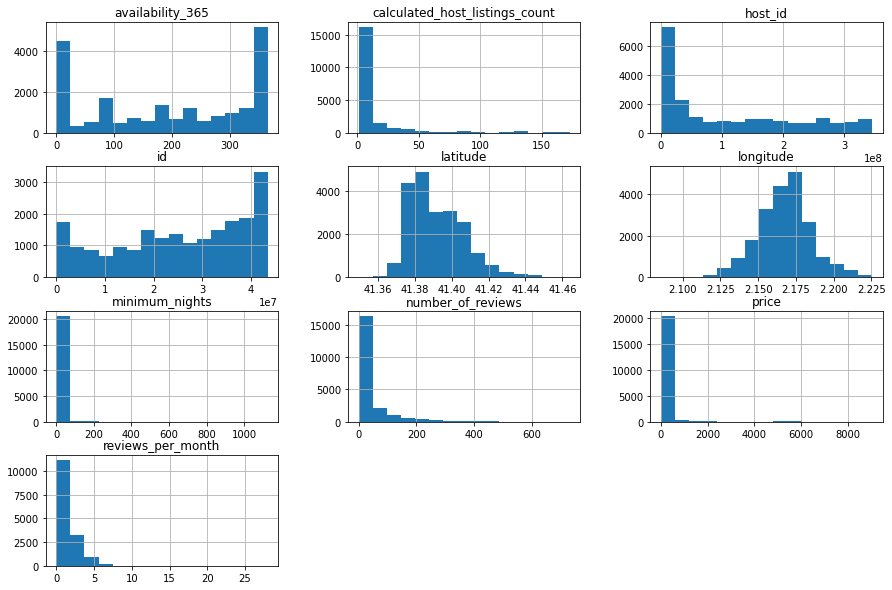

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights`e `calculates_host_listings_count`. 

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estátistico por meio do método `describe()`
* Plotas `boxplots`para a variável. 

In [9]:
# ver o resumo estátistico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20858.000000,20858.000000,20858.000000,15511.000000,20858.000000,20858.000000
mean,124.210711,9.916051,34.655336,1.369111,14.880142,193.537540
std,405.947246,20.589782,64.189641,1.439218,31.028560,137.941732
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,36.000000,1.000000,0.000000,0.290000,1.000000,69.000000
50%,59.000000,2.000000,6.000000,0.870000,3.000000,203.000000
75%,100.000000,6.000000,39.000000,2.070000,11.000000,339.000000
max,9034.000000,1124.000000,731.000000,27.980000,173.000000,365.000000


Olhando o resumo estátistico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 100, porém seu valor máximo é 9034.
* A quantidade mínima de noites (`minimum_nghts`) está acima de 365 dias no ano.

### Boxplot para minimum_nights

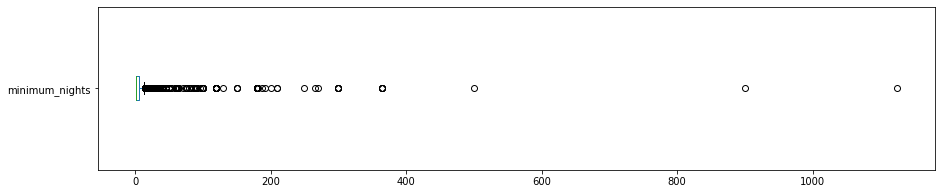

minimun_nights: valores acima de 30:
3581 entradas
17.1685%


In [14]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights 
print("minimun_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

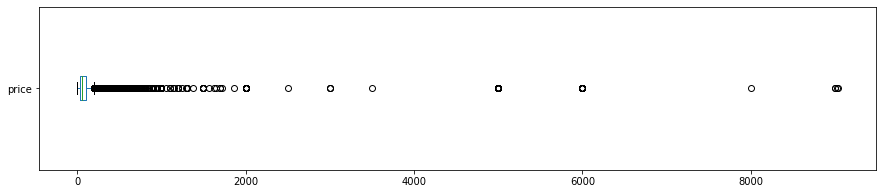


price: valores acima de 1500
130 entradas
0.6233%


In [12]:
# price 
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# ver a quantidade de entradas acima de 1500 para price 
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

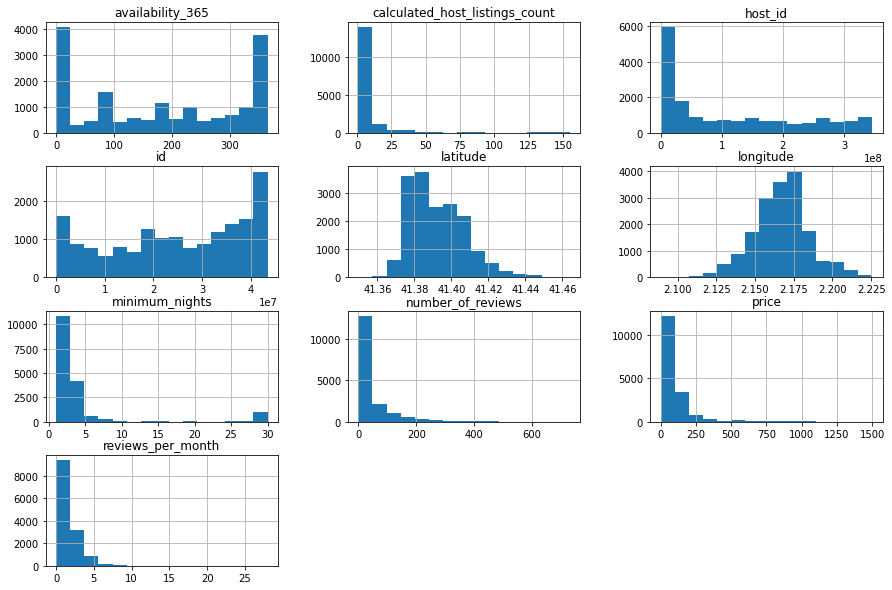

In [15]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#plotar o histograma para as variáveis numéricas 
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price``

s = df_clean[['price']].mean()  

print(s)

price    100.50495
dtype: float64


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. Nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [17]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a matriz de correlação

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.066339,-0.030853,-0.039553,0.130505,0.198310
minimum_nights,-0.066339,1.000000,-0.120136,-0.145199,-0.034301,0.069378
number_of_reviews,-0.030853,-0.120136,1.000000,0.696890,-0.089427,0.128951
reviews_per_month,-0.039553,-0.145199,0.696890,1.000000,-0.117209,0.067440
calculated_host_listings_count,0.130505,-0.034301,-0.089427,-0.117209,1.000000,0.248550
availability_365,0.198310,0.069378,0.128951,0.067440,0.248550,1.000000


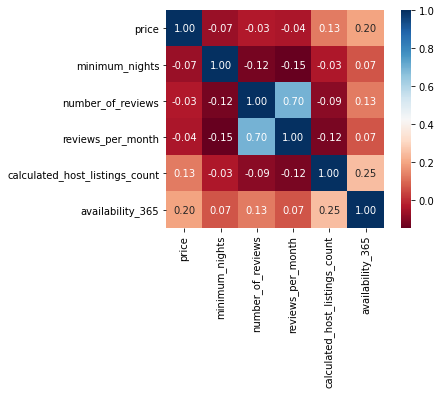

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);



### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna variável `room_type`indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas. 

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       9869
Entire home/apt    6664
Hotel room          402
Shared room         235
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.574782
Entire home/apt    0.388119
Hotel room         0.023413
Shared room        0.013687
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de verificar uma variável em função de outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighborhoods*) a partir do preço de locação.



In [22]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Eixample               119.770098
Gràcia                 112.871012
Sant Martí             103.686534
Sarrià-Sant Gervasi     96.963581
Ciutat Vella            89.315849
Les Corts               84.611825
Sants-Montjuïc          82.226809
Horta-Guinardó          61.559865
Sant Andreu             48.014184
Nou Barris              39.845528
Name: price, dtype: float64

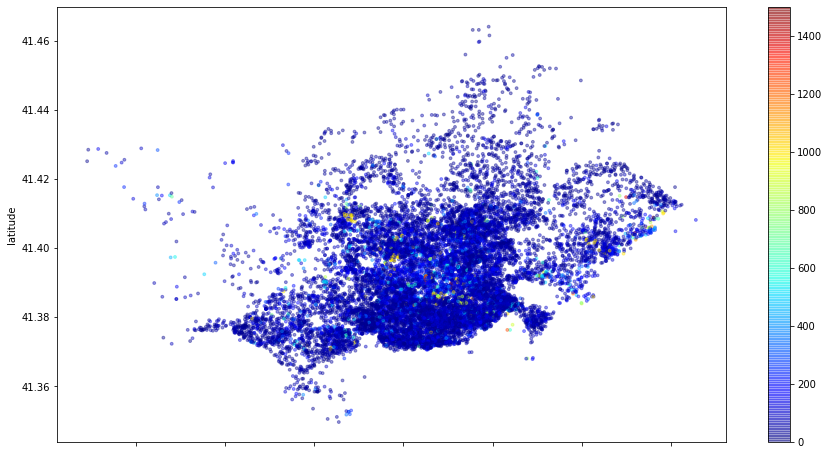

In [26]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(15,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [24]:
# ver a média da coluna `minimum_nights``
s = df_clean[['minimum_nights']].mean()  

print(s)

minimum_nights    4.037624
dtype: float64


## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.